<a id="header"></a>
# Part 3: levels 52-61

[Return home](../)

In [2]:
from samurai import *
from plotting import *

import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sb
from IPython.display import display
%matplotlib inline

pd.options.display.max_rows = None

## lvl 52-61

Level 52 introduces the Kenki system with the Kenki Mastery I trait. The Kenki gauge takes on values between 0 and 100. This resource is used to fuel basically all of your abilities and is acquired mostly through the execution of weaponskills. The Kenki Mastery I trait grants Kenki for the following actions:

In [6]:
kenki_table_I = [('Enpi', 5), ('Gekko (rear combo)', 5), 
                 ('Mangetsu (combo)', 5), ('Kasha (side combo)', 5), 
                 ('Oka (combo)', 5), ('Yukikaze (combo)', 5)]

kenki_table_df = pd.DataFrame(kenki_table_I, columns=['Weaponskill', 'Kenki granted'])
kenki_table_df.set_index('Weaponskill')
display(kenki_table_df)

,Weaponskill,Kenki granted
0,Enpi,5
1,Gekko (rear combo),5
2,Mangetsu (combo),5
3,Kasha (side combo),5
4,Oka (combo),5
5,Yukikaze (combo),5


Along with the trait, you acquire the first Kenki spender, Hissatsu: Kaiten. This ability, on a short 5s recast timer, increases the potency of your next weaponskill by 50% at the cost of 20 Kenki. Since it is specifically applied to the potency, it does not affect the "additional effect" aka the DoT of Higanbana. Therefore, it's basically our version of Life Surge or Barrage and we want to use it on Midare Setsugekka or Tenka Goken.

Level 54 introduces the gap-closer ability, Hissatsu: Gyoten, with a Kenki cost of 10. Level 56 gives the backstep disengage, Hissatsu: Yaten. While not part of an optimal dummy rotation, these mobility skills are useful in practice. See part 5 for in-depth discussion of the Kenki spenders.

At level 58, you learn Merciful Eyes, a self-heal linked to the Third Eye ability. At level 60, you obtain the Meditate ability. This ability, with a relatively short recast time of 60s, increases the Kenki gauge while channeled in battle for up to 15s at a rate of 10 Kenki per server tick up to a total of 50 Kenki. Note that it does nothing outside of combat.

The accrual rate of Kenki under Kenki Mastery I is quite low, about 30 Kenki every 8 GCDs (going through all three Sen combos). If we prioritize spending Kenki on Hissatsu: Kaiten for Midare Setsugekka, we'll have a net surplus of Kenki over time, assuming we don't spend Kenki on the movement utilities. This permits the use of Hissatsu: Kaiten on combo finishers (Kasha and Gekko) as excess Kenki accumulates, for a gain of 200 potency at the cost of 25 Kenki.

### Example Hissatsu: Kaiten usage

In [13]:
sam = Samurai(kenki_mastery=1)

actions = [('Hakaze'), ('Shifu'), ('Kasha'), ('Hakaze'),
           ('Jinpu'), ('Higanbana'), ('Gekko'), ('Hakaze'),
           ('Yukikaze'), ('Hakaze'), ('Shifu'), ('Kasha', 'Hissatsu: Kaiten'),
           ('Midare Setsugekka', 'Meikyo Shisui'), ('Gekko'), ('Yukikaze'), ('Kasha'),
           ('Midare Setsugekka')
           ]

In [14]:
df0, average_potency, pps = sam.parse_rotation(actions)
display(df0)

average potency per GCD = 452.39323529411763
average potency per second = 208.081304113


,Time,Weaponskill,Ability,Potency,Jinpu,Shifu,Yukikaze,Higanbana,Kenki,Total Potency
0,0.00,Hakaze,,150.000,False,False,False,0,0,150.000
1,2.40,Shifu,,280.000,False,False,False,0,0,430.000
2,4.56,Kasha,,400.000,False,True,False,0,0,830.000
3,6.72,Hakaze,,150.000,False,True,False,0,5,980.000
4,8.88,Jinpu,,280.000,False,True,False,0,5,1260.000
5,11.04,Higanbana,,276.000,True,True,False,0,5,1536.000
6,13.20,Gekko,,488.980,True,True,False,1,5,2024.980
7,15.36,Hakaze,,201.480,True,True,False,1,10,2226.460
8,17.52,Yukikaze,,419.980,True,True,False,1,10,2646.440
9,19.68,Hakaze,,220.455,True,True,True,1,15,2866.895


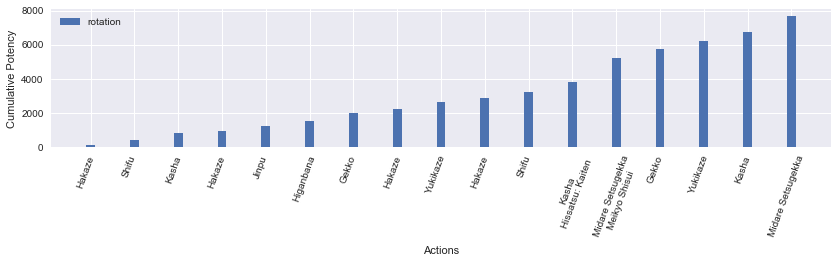

In [16]:
plot_potency(df0)

### Example Hissatsu: Kaiten usage for AoE rotations

In [20]:
dfs_aoe = []
pps_aoe = []
labels = []

n_target_range = range(2, 8)

for n_targets in n_target_range:
    sam = Samurai(kenki_mastery=1)
    
    actions = [('Hakaze'), ('Shifu'), ('Kasha'), ('Hakaze'),
               ('Jinpu'), ('Gekko'), ('Tenka Goken'), ('Fuga'),
               ('Oka'), ('Fuga'), ('Mangetsu', 'Hissatsu: Kaiten'), ('Tenka Goken'), 
               ('Fuga'), ('Mangetsu'), ('Fuga'), ('Oka'), 
               ('Tenka Goken')]
    
    print('number of targets = %s' % n_targets)
    df_temp, average_potency, pps = sam.parse_rotation(actions, n_targets=n_targets)
    dfs_aoe.append(df_temp)
    pps_aoe.append(pps)
    
    labels.append('%s targets' % n_targets)
    print('\n')

display(dfs_aoe[-1])

number of targets = 2
average potency per GCD = 420.06470588235294
average potency per second = 193.211580087


number of targets = 3
average potency per GCD = 558.6058823529411
average potency per second = 256.93452381


number of targets = 4
average potency per GCD = 683.2117647058824
average potency per second = 314.247835498


number of targets = 5
average potency per GCD = 793.8823529411765
average potency per second = 365.151515152


number of targets = 6
average potency per GCD = 890.6176470588235
average potency per second = 409.645562771


number of targets = 7
average potency per GCD = 987.3529411764706
average potency per second = 454.13961039




,Time,Weaponskill,Ability,Potency,Jinpu,Shifu,Yukikaze,Higanbana,Kenki,Total Potency
0,0.00,Hakaze,,150.0,False,False,False,0,0,150.0
1,2.40,Shifu,,280.0,False,False,False,0,0,430.0
2,4.56,Kasha,,400.0,False,True,False,0,0,830.0
3,6.72,Hakaze,,150.0,False,True,False,0,5,980.0
4,8.88,Jinpu,,280.0,False,True,False,0,5,1260.0
5,11.04,Gekko,,460.0,True,True,False,0,5,1720.0
6,13.20,Tenka Goken,,2070.0,True,True,False,0,10,3790.0
7,15.36,Fuga,,805.0,True,True,False,0,10,4595.0
8,17.52,Oka,,1150.0,True,True,False,0,10,5745.0
9,19.68,Fuga,,805.0,True,True,False,0,15,6550.0


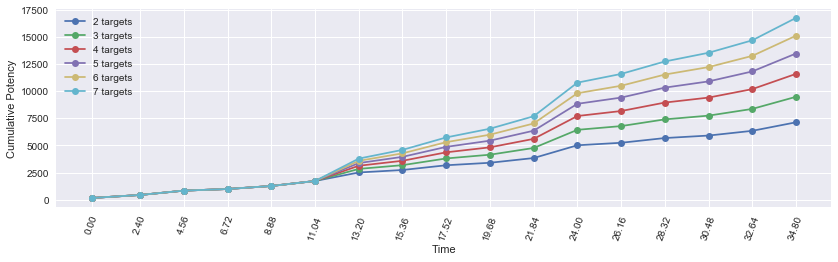

In [21]:
compare_n_potencies(dfs_aoe, labels)

<a href="#header">back to the top...</a>